In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
import warnings
warnings.filterwarnings("ignore")

In [2]:
elica_stove = pd.read_csv('Elica_Stove.csv')
glen_stove = pd.read_csv('Glen_Stove.csv')
faber_stove = pd.read_csv('Faber_Stove.csv')

In [3]:
elica_chimney = pd.read_csv('Elica_Chimney.csv')
glen_chimney = pd.read_csv('Glen_Chimney.csv')
faber_chimney = pd.read_csv('Faber_Chimney.csv')

In [4]:
elica_stove = elica_stove[['Product Name', 'Price', 'Rating']]
glen_stove = glen_stove[['Product Name', 'Price', 'Rating']]
faber_stove = faber_stove[['Product Name', 'Price', 'Rating']]

In [5]:
elica_chimney = elica_chimney[['Product Name', 'Price', 'Rating']]
glen_chimney = glen_chimney[['Product Name', 'Price', 'Rating']]
faber_chimney = faber_chimney[['Product Name', 'Price', 'Rating']]

In [6]:
stove = pd.concat([elica_stove, glen_stove, faber_stove], axis = 0)
stove['Category'] = 'Stove'
stove.reset_index(inplace = True)
stove.drop('index', axis = 1, inplace = True)

In [7]:
chimney = pd.concat([elica_chimney, glen_chimney, faber_chimney], axis = 0)
chimney['Category'] = 'Chimney'
chimney.reset_index(inplace = True)
chimney.drop('index', axis = 1, inplace = True)

In [8]:
data = pd.concat([stove, chimney], axis = 0)
data.head()

,Product Name,Price,Rating,Category
0,Elica,"₹3,499",4.1 out of 5 stars,Stove
1,Elica,"₹4,999",4.0 out of 5 stars,Stove
2,Elica,"₹12,999",3.6 out of 5 stars,Stove
3,Elica,"₹6,999",3.9 out of 5 stars,Stove
4,Elica,"₹4,099",4.0 out of 5 stars,Stove


In [9]:
data.reset_index(inplace = True)

### Data Preprocessing

In [10]:
for i in range(len(data)):
    data['Product Name'][i] = data['Product Name'][i].split()[0] 

In [11]:
data['Product Name'].value_counts()

Faber        1420
Glen         1280
Elica         920
GLEN          260
Vidiem        177
BLOWHOT       160
Whirlpool     100
Kutchina       78
Lifelong       62
Hindware       41
KAFF           40
V-Guard        20
MODA            1
iBELL           1
Name: Product Name, dtype: int64

### Fixing product name

In [12]:
### Glen
data['Product Name'] = np.where(data['Product Name'] == 'GLEN', 'Glen', data['Product Name'])
data['Product Name'].value_counts()

Glen         1540
Faber        1420
Elica         920
Vidiem        177
BLOWHOT       160
Whirlpool     100
Kutchina       78
Lifelong       62
Hindware       41
KAFF           40
V-Guard        20
MODA            1
iBELL           1
Name: Product Name, dtype: int64

In [13]:
df = data.copy()

In [14]:
Glen = df[df['Product Name'] == 'Glen']
Elica = df[df['Product Name'] == 'Elica']
Faber = df[df['Product Name'] == 'Faber']

In [15]:
df = pd.concat([Glen, Elica, Faber], axis = 0)
df['Product Name'].value_counts()

Glen     1540
Faber    1420
Elica     920
Name: Product Name, dtype: int64

In [16]:
df.dropna(inplace = True)

In [17]:
df = df.reset_index().drop('index', axis = 1)

In [18]:
df.drop('level_0', axis = 1, inplace = True)

In [19]:
for i in range(len(df)):
    df['Price'][i] = df['Price'][i].strip('₹')
for i in range(len(df)):
    df['Price'][i] = df['Price'][i].replace(',','')

In [20]:
for i in range(len(df)):
    df['Rating'][i] = df['Rating'][i].split()[0]

In [21]:
df['Price'] = df['Price'].astype('float64')

In [22]:
df['Rating'] = df['Rating'].astype('float64')

In [23]:
df = df.sample(frac = 1)
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)
df.head()

,Product Name,Price,Rating,Category
0,Glen,4695.0,3.7,Stove
1,Elica,14039.0,4.2,Chimney
2,Glen,1895.0,4.0,Stove
3,Faber,12981.0,3.3,Stove
4,Elica,15490.0,3.6,Stove


In [24]:
df.to_csv('data_for_visualisation.csv')

### Visualisations 

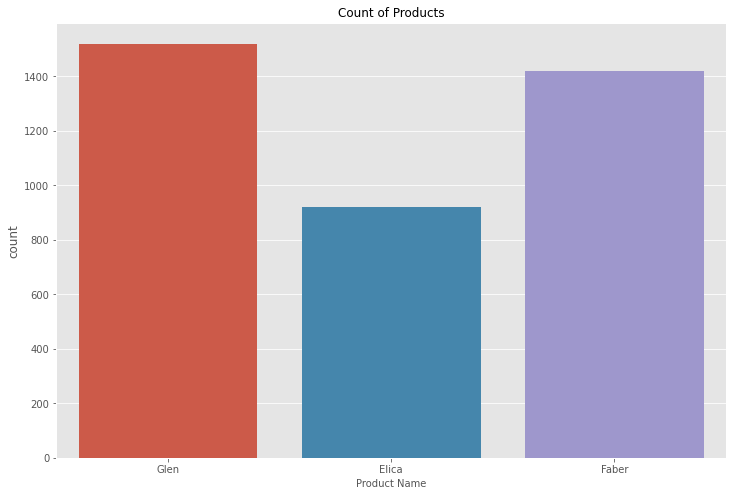

In [48]:
sns.countplot(data = df, x = 'Product Name')
plt.title('Count of Products', fontsize = 12)
plt.xlabel('Product Name', fontsize = 10)
plt.savefig('Count of Products.png', bbox_inches = 'tight')
plt.show()

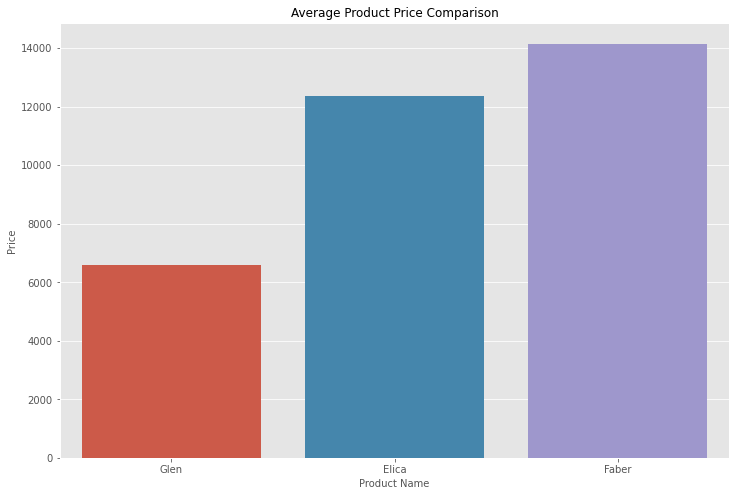

In [49]:
sns.barplot(data = df, x = 'Product Name', y = 'Price', ci = False)
plt.title('Average Product Price Comparison', fontsize = 12)
plt.xlabel('Product Name',fontsize = 10)
plt.ylabel('Price',fontsize = 10)
plt.savefig('Average Product Price Comparison.png', bbox_inches = 'tight')
plt.show()

In [50]:
df.head()

,Product Name,Price,Rating,Category
0,Glen,4695.0,3.7,Stove
1,Elica,14039.0,4.2,Chimney
2,Glen,1895.0,4.0,Stove
3,Faber,12981.0,3.3,Stove
4,Elica,15490.0,3.6,Stove


In [51]:
df_stove = df[df['Category'] == 'Stove']
df_chimney = df[df['Category'] == 'Chimney']

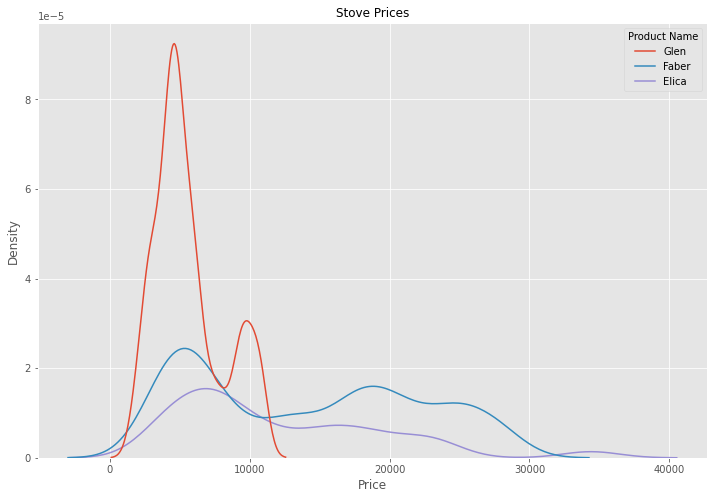

In [68]:
sns.kdeplot(data = df_stove, x = 'Price', hue = 'Product Name')
plt.title('Stove Prices', fontsize = 12)
plt.savefig('Stove Price.png', bbox_inches = 'tight')
plt.show()

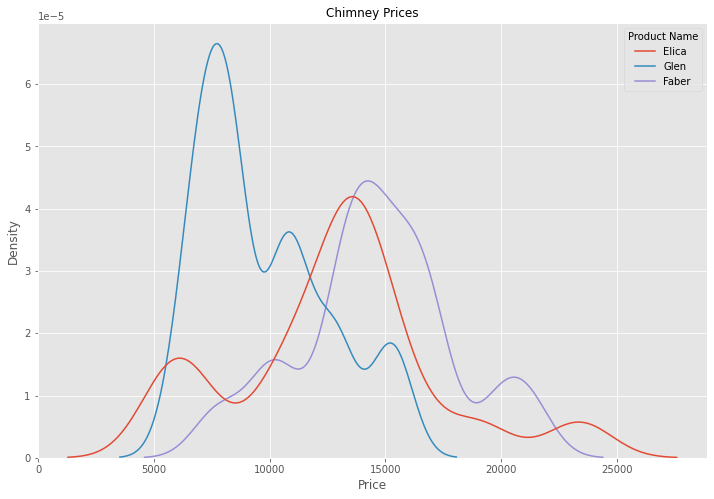

In [69]:
sns.kdeplot(data = df_chimney, x = 'Price', hue = 'Product Name')
plt.title('Chimney Prices', fontsize = 12)
plt.savefig('Chimney Price.png', bbox_inches = 'tight')
plt.show()

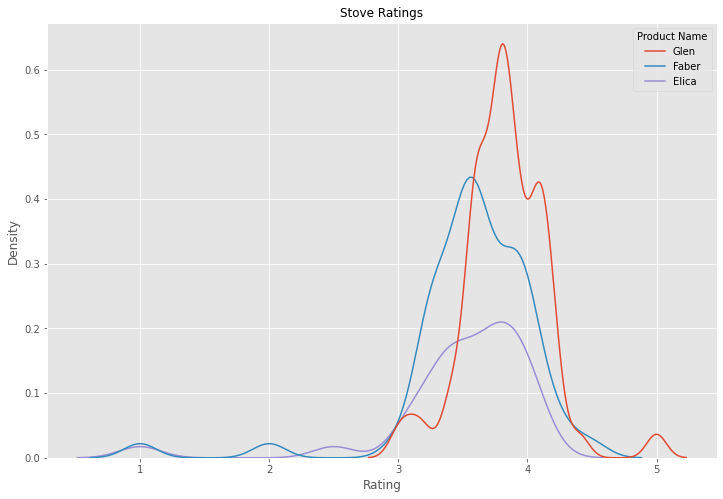

In [70]:
sns.kdeplot(data = df_stove, x = 'Rating', hue = 'Product Name')
plt.title('Stove Ratings', fontsize = 12)
plt.savefig('Stove Ratings.png', bbox_inches = 'tight')
plt.show()

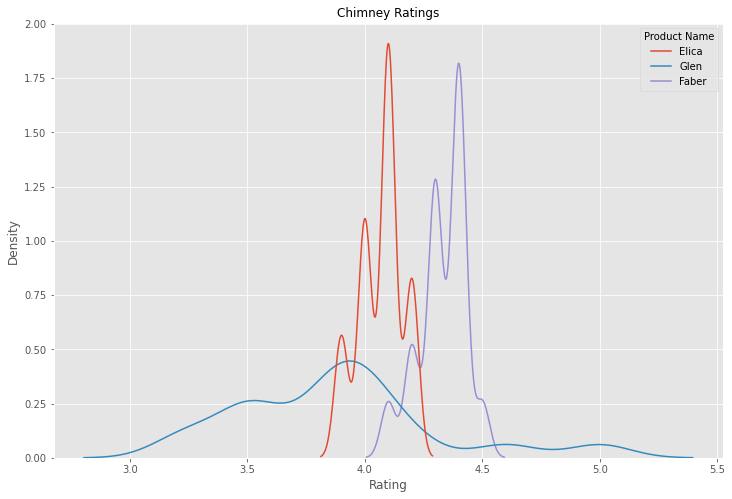

In [71]:
sns.kdeplot(data = df_chimney, x = 'Rating', hue = 'Product Name')
plt.title('Chimney Ratings', fontsize = 12)
plt.savefig('Chimney Ratings.png', bbox_inches = 'tight')
plt.show()

In [65]:
df_stove.groupby('Product Name').median()

,Price,Rating
Product Name,,
Elica,9740.0,3.6
Faber,12990.0,3.6
Glen,4995.0,3.8


In [66]:
df_chimney.groupby('Product Name').median()

,Price,Rating
Product Name,,
Elica,13299.0,4.1
Faber,14570.5,4.4
Glen,8490.0,3.9
